Student Name: **Vipul Popat**
Student ID : **18195121**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.utils import shuffle
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv("bank_et2.csv",index_col=['Unnamed: 0'])

In [3]:
df.head(10)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
df.tail(10)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,-0.064640,-0.001414,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,-0.921793,0.819346,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,-0.611713,2.519517,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,-0.624331,0.273081,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,-0.249693,1.152874,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
nunique = df.nunique()
nunique

age               68
job               11
marital            3
education          3
default            2
balance         1274
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            2
loan               2
contact            2
day               31
month             12
duration         655
campaign          11
pdays            363
previous          26
poutcome           3
subscribed         2
dtype: int64

In [7]:
nulldf = df.isnull().sum() #Check for null values in field
nulldf

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [8]:
# Looking at categorical values
def cat_exploration(column):
    return df[column].value_counts()

# Imputing the missing values
def cat_imputation(column, value):
    df.loc[df[column].isnull(),column] = value

In [9]:
cat_exploration('job')

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [10]:
cat_imputation('job', 'not-working')

In [11]:
table = df.pivot_table(values='age', 
                       index='marital', 
                       columns='job', 
                       aggfunc=np.median)
print(table)

job       admin.  blue-collar  entrepreneur  housemaid  management  \
marital                                                              
divorced    40.0         42.0          47.5       55.0        45.0   
married     42.5         40.0          45.0       49.0        41.0   
single      33.0         32.0          34.5       34.5        32.0   

job       not-working  retired  self-employed  services  student  technician  \
marital                                                                        
divorced          NaN     67.0           46.0      47.0     38.0        42.0   
married          52.0     67.0           46.0      37.0     33.0        43.5   
single           41.5     60.5           29.0      32.0     25.0        33.0   

job       unemployed  
marital               
divorced        40.0  
married         43.0  
single          32.0  


In [12]:
df[df.age.isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


In [13]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['marital'], x['job']]


# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [14]:
df['age'].describe()

count    2000.000000
mean       41.742000
std        12.711657
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [15]:
cat_exploration('education')

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [16]:
cat_imputation('education', 'unknown')

In [17]:
cat_exploration('contact')

cellular     1663
telephone     146
Name: contact, dtype: int64

In [18]:
cat_imputation('contact', 'cellular')

In [19]:
cat_exploration('poutcome')

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [20]:
cat_imputation('poutcome', 'unknown')

we have imputed the NaN of above features to unknown as it would not introduce any bias into the dataset or learning process if we choose these features for learning.

In [21]:
nulldf = df.isnull().sum() #Check for null values in field
nulldf

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64

## Task 1  (CS5062)

Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

The following were the missing values within the dataset
- age              12
- job              10
- education       104
- contact         191
- poutcome        454

Assuming that the age would be related to the **job** and **marital status**, a pivotal table was constructed to get the average age based on these two features. The NaN value were then populated to the samples where the age was absent.

These rest of fields are : job 10 , education 104 , contact 191 , poutcome 454
All of these are categorical values and there was no clear **most frequent** category amontst each of those features.
The following fields was replaced by **unknown** due not the fact that they do not depend on any other feature. 
Creating an **unkown** category for these features can then yield some interesting insights and could potentially be predictive when building our model.

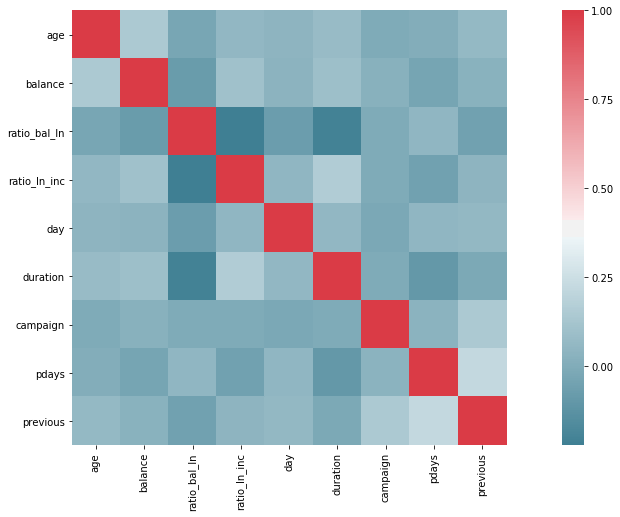

In [22]:
f, ax = plt.subplots(figsize=(20, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

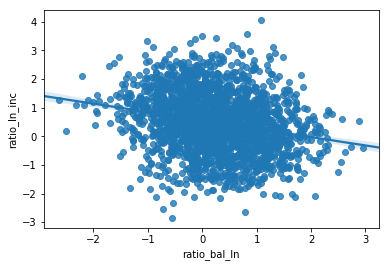

In [23]:
sns.regplot(x='ratio_bal_ln', y='ratio_ln_inc', data=df)

## Task 2 (CS5062)


Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [24]:
df.describe(include=[np.number])

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.742000,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.711657,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


**Age** and **balance** features above show some extreme values that require further normalization

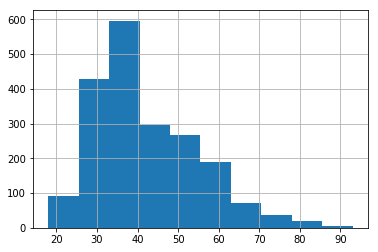

In [25]:
df['age'].hist()

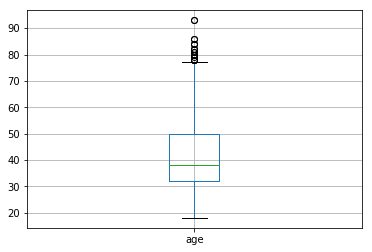

In [26]:
df.boxplot(column='age')

Here we are seeing some values well outside the standard deviation for these attributes. We cant remove them as the data is still valid and it would be fair to replace them with an alternative. In which case, the only option that remains is to apply a log function so the extreme values don't cause a -ve impact on learning.

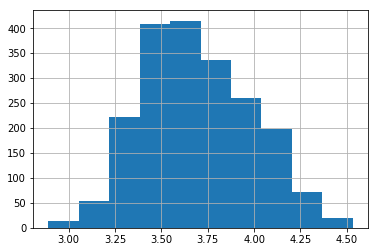

In [27]:
 # Use a log transformation to decrease the impact of extreme values in column age
df['age_log'] = np.log(df['age'])
df['age_log'].hist()

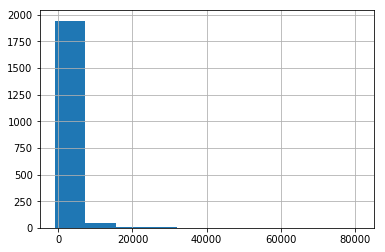

In [28]:
df["balance"].hist()

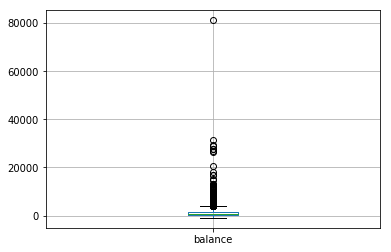

In [29]:
df.boxplot(column='balance')

As seen by the histogram and box plots for the balance above, there is a customer with balance nearly 80000. This can be considered as a outlier but **cannot be removed** as there are always some wealthy customers. 
On the contrary, there are some customers with negative balance as well with the min being -980. If we perform a logarithmic transformation in order to normalize the distribution of data, the -ve or 0 values will be transformed as **undefined or infinity**. This would lead to the dataset being unusable for learning.
Hence transforming the balance as +ve values by adding 1000 to each customers balance and then performing a logarithmic transformation would lead to a feature set which would have a **normal distribution** as seen below

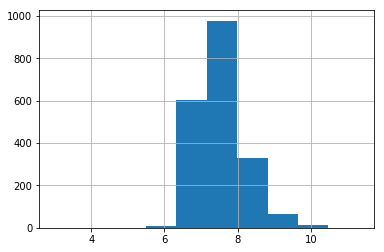

In [30]:
df["balance_log"] = np.log(df["balance"] + 1000)
df['balance_log'].hist()

### Task 3 CS5062)

Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

I am still unable to figure out what new feature needs to be created and hence this task is still a **TODO**


### Task 4 (CE6002)

*Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.*

*Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).*

### Prepare the data
Steps followed to prepare the data for logistic regression:
  * Extract the features
  * Extract the target
  * Shuffle the data and split between training and testing data
  * Fit the model on the training data set

In [31]:
# extract features
# Start by converting "subscribed" target from "yes/no" to "1/-1"
df['subscribed_code'] = df['subscribed'].map({'yes': 1, 'no': -1})

# Use 'ratio_bal_ln' and 'ratio_ln_inc' as our inputs
data = df[['ratio_bal_ln', 'ratio_ln_inc', 'subscribed_code', 'age_log', 'balance_log']]
# Use 'ratio_bal_ln' and 'ratio_ln_inc' as our inputs
X = data[['ratio_bal_ln', 'ratio_ln_inc','age_log', 'balance_log']].values

# Use 'subscribed_code' as the target
y = data['subscribed_code'].values

def get_error_percentage(X_data, y_data, logreg):
    y_predicted = logreg.predict(X_data)
    errors = 0
    for i in range(len(y_predicted)):
        if(y_predicted[i]!=y_data[i]):
            errors+=1
    print("Errors = {}".format(errors))
    print("Data Size = {}".format(len(y_data)))
    return errors/len(y_data)

def run_logreg(X,y):
    # shuffle and split
    X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
    print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    print ("Train Score: {:.2%}".format(logreg.score(X_train, y_train)))
    print ("Test Score: {:.2%}".format(logreg.score(X_test, y_test)))
    ein = get_error_percentage(X_train, y_train, logreg);
    eout = get_error_percentage(X_test, y_test, logreg)
    print("Error percentage on train data ein = {}".format(ein))
    print("Error percentage on test data eout = {}".format(eout))
    return logreg, ein, eout
    


#### Fit the model

Using logistic regression 

In [32]:
classifier, ein, eout = run_logreg(X,y)


X_train.shape:(1400, 4), y_train.shape:(1400,)
X_test.shape :(600, 4), y_test.shape :(600,)
Train Score: 78.71%
Test Score: 80.83%
Errors = 298
Data Size = 1400
Errors = 115
Data Size = 600
Error percentage on train data ein = 0.21285714285714286
Error percentage on test data eout = 0.19166666666666668


/home/vipulpopat/Tools/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Plot Probabilities and Hoeffing Bound as per example in exercise 1.10
# Pass in dataset and weights and repeat value and function will then 
# plot probabilities and bounds for a variety of values of N
# courtesy Martin Power - he made it look so easy to get it done
def hoeffding_plot(X, y, hypothesis, repeats=100):

    N = [1,10,50,100,200,300,500,1000]

    for n in N:
        d_ein = np.empty((repeats))
        d_eout = np.empty((repeats))
        d_abs = []

        test_size = n/len(X)
        for i in range(repeats):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            
            score_test   = hypothesis.score(X_test, y_test)
            score_train  = hypothesis.score(X_train, y_train)

            # Substract scores from 1 to convert to Ein/Eout
            etrain = 1 - score_train
            etest = 1 - score_test
            
            ein  = etrain #calc_error(X_test, y_test, weights)
            eout = etest  #calc_error(X_train, y_train, weights)
            diff = abs(ein-eout)
            d_ein[i] = ein
            d_eout[i] = eout
            d_abs.append(diff)


        ein_avg  = f"Ein(avg)  = {d_ein.mean():.3f}"
        eout_avg = f"Eout(avg) = {d_eout.mean():.3f}"

        prob_epsilon=[]
        epsilons = np.arange(0, 1, 0.01)
        for e in epsilons:
            prob_epsilon.append(len([1 for i in d_abs if i > e])/len(d_abs))

        bound_label='Hoeffding Bound for N='+str(n)
        prob_label = 'P[abs(Ein-Eout)>e] for N='+str(n)
        title = 'N='+str(n)+" Repeats="+str(repeats)
        plt.figure()
        plt.plot(epsilons, prob_epsilon,label=prob_label)
        plt.plot(epsilons, [2*math.exp(-2*e**2*n) for e in epsilons],label=bound_label)
        plt.legend()
        plt.text(0.8, 1.5, ein_avg+"\n"+eout_avg)
        plt.xlabel('Epsilon')
        plt.title(title)
        plt.show


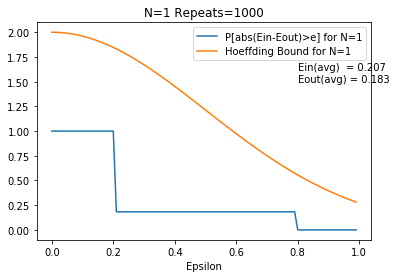

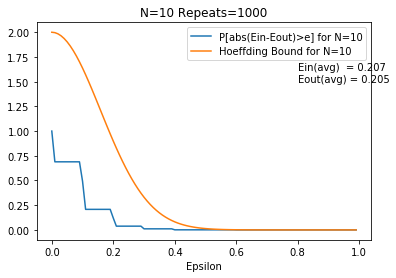

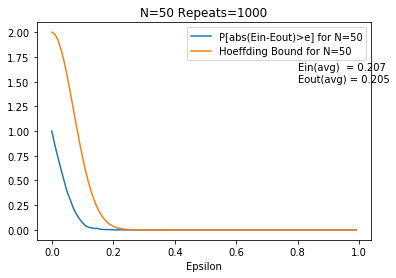

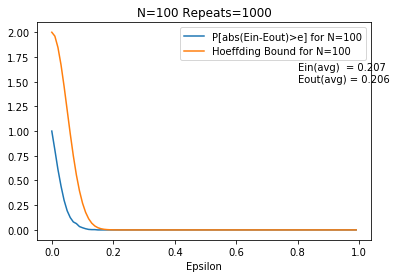

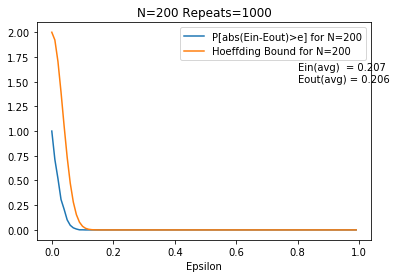

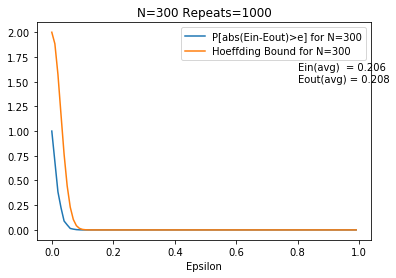

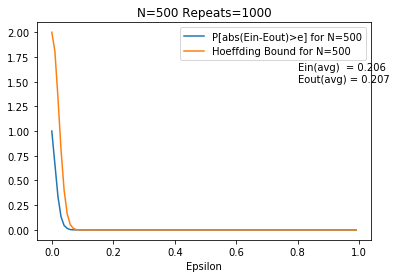

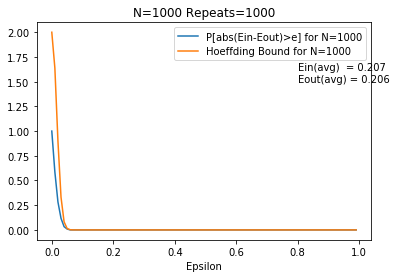

In [35]:
# Pass the weights for the chosen hypothesis and the dataset to a function
# that will generate random datasets and plot the performance versus the Hoeffding bound
hoeffding_plot(X,y,classifier,repeats=1000)

**TODO**
- VC bound plot

### Task 5 (CE6002)

*Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.*

**TODO**
Havent been able to find time to get this done as a first attempt.